## Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [4]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [8]:
cat_cols=df.drop(['num_passengers', 'purchase_lead','length_of_stay', 'flight_duration'],axis=1).columns
cat_cols

Index(['sales_channel', 'trip_type', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'booking_complete'],
      dtype='object')

In [9]:
for i in df.columns:
    print(f"Unique values in column '{i}': {df[i].nunique()}")

Unique values in column 'num_passengers': 9
Unique values in column 'sales_channel': 2
Unique values in column 'trip_type': 3
Unique values in column 'purchase_lead': 470
Unique values in column 'length_of_stay': 335
Unique values in column 'flight_hour': 24
Unique values in column 'flight_day': 7
Unique values in column 'route': 799
Unique values in column 'booking_origin': 104
Unique values in column 'wants_extra_baggage': 2
Unique values in column 'wants_preferred_seat': 2
Unique values in column 'wants_in_flight_meals': 2
Unique values in column 'flight_duration': 21
Unique values in column 'booking_complete': 2


### Encoding:
* Already encoded categorical columns: `wants_extra_baggage`,`wants_preferred_seat`, `wants_in_flight_meals`, and `booking_complete`
* Columns need to be encoded: `sales_channel`, `trip_type`, `flight_day`, `route`, and `booking_origin`
* `sales_channel`, `trip_type` can be encoded with LabelEncoder as they have less no.of unique values and `flight_day` by maaping the numerical values      
* `route`and `booking_origin` can be encoded with Leave-One-Out encoding as these are having too many unique values.

### Data types:
* All columns have discrete numerical values but not all categorical

### Plots:
* Countplots for all these categorical columns
* Barplots to analyze relationship between `flight_hour`, `num_passengers`, `flight_duration`, and `length_of_stay` v/s `booking_complete`
* Distplots to anayze distribution of data points for all columns
* Heatmap to check multi-collinearity and correlation between features and target

In [11]:
df['flight_duration']

0        5.52
1        5.52
2        5.52
3        5.52
4        5.52
         ... 
49995    5.62
49996    5.62
49997    5.62
49998    5.62
49999    5.62
Name: flight_duration, Length: 50000, dtype: float64

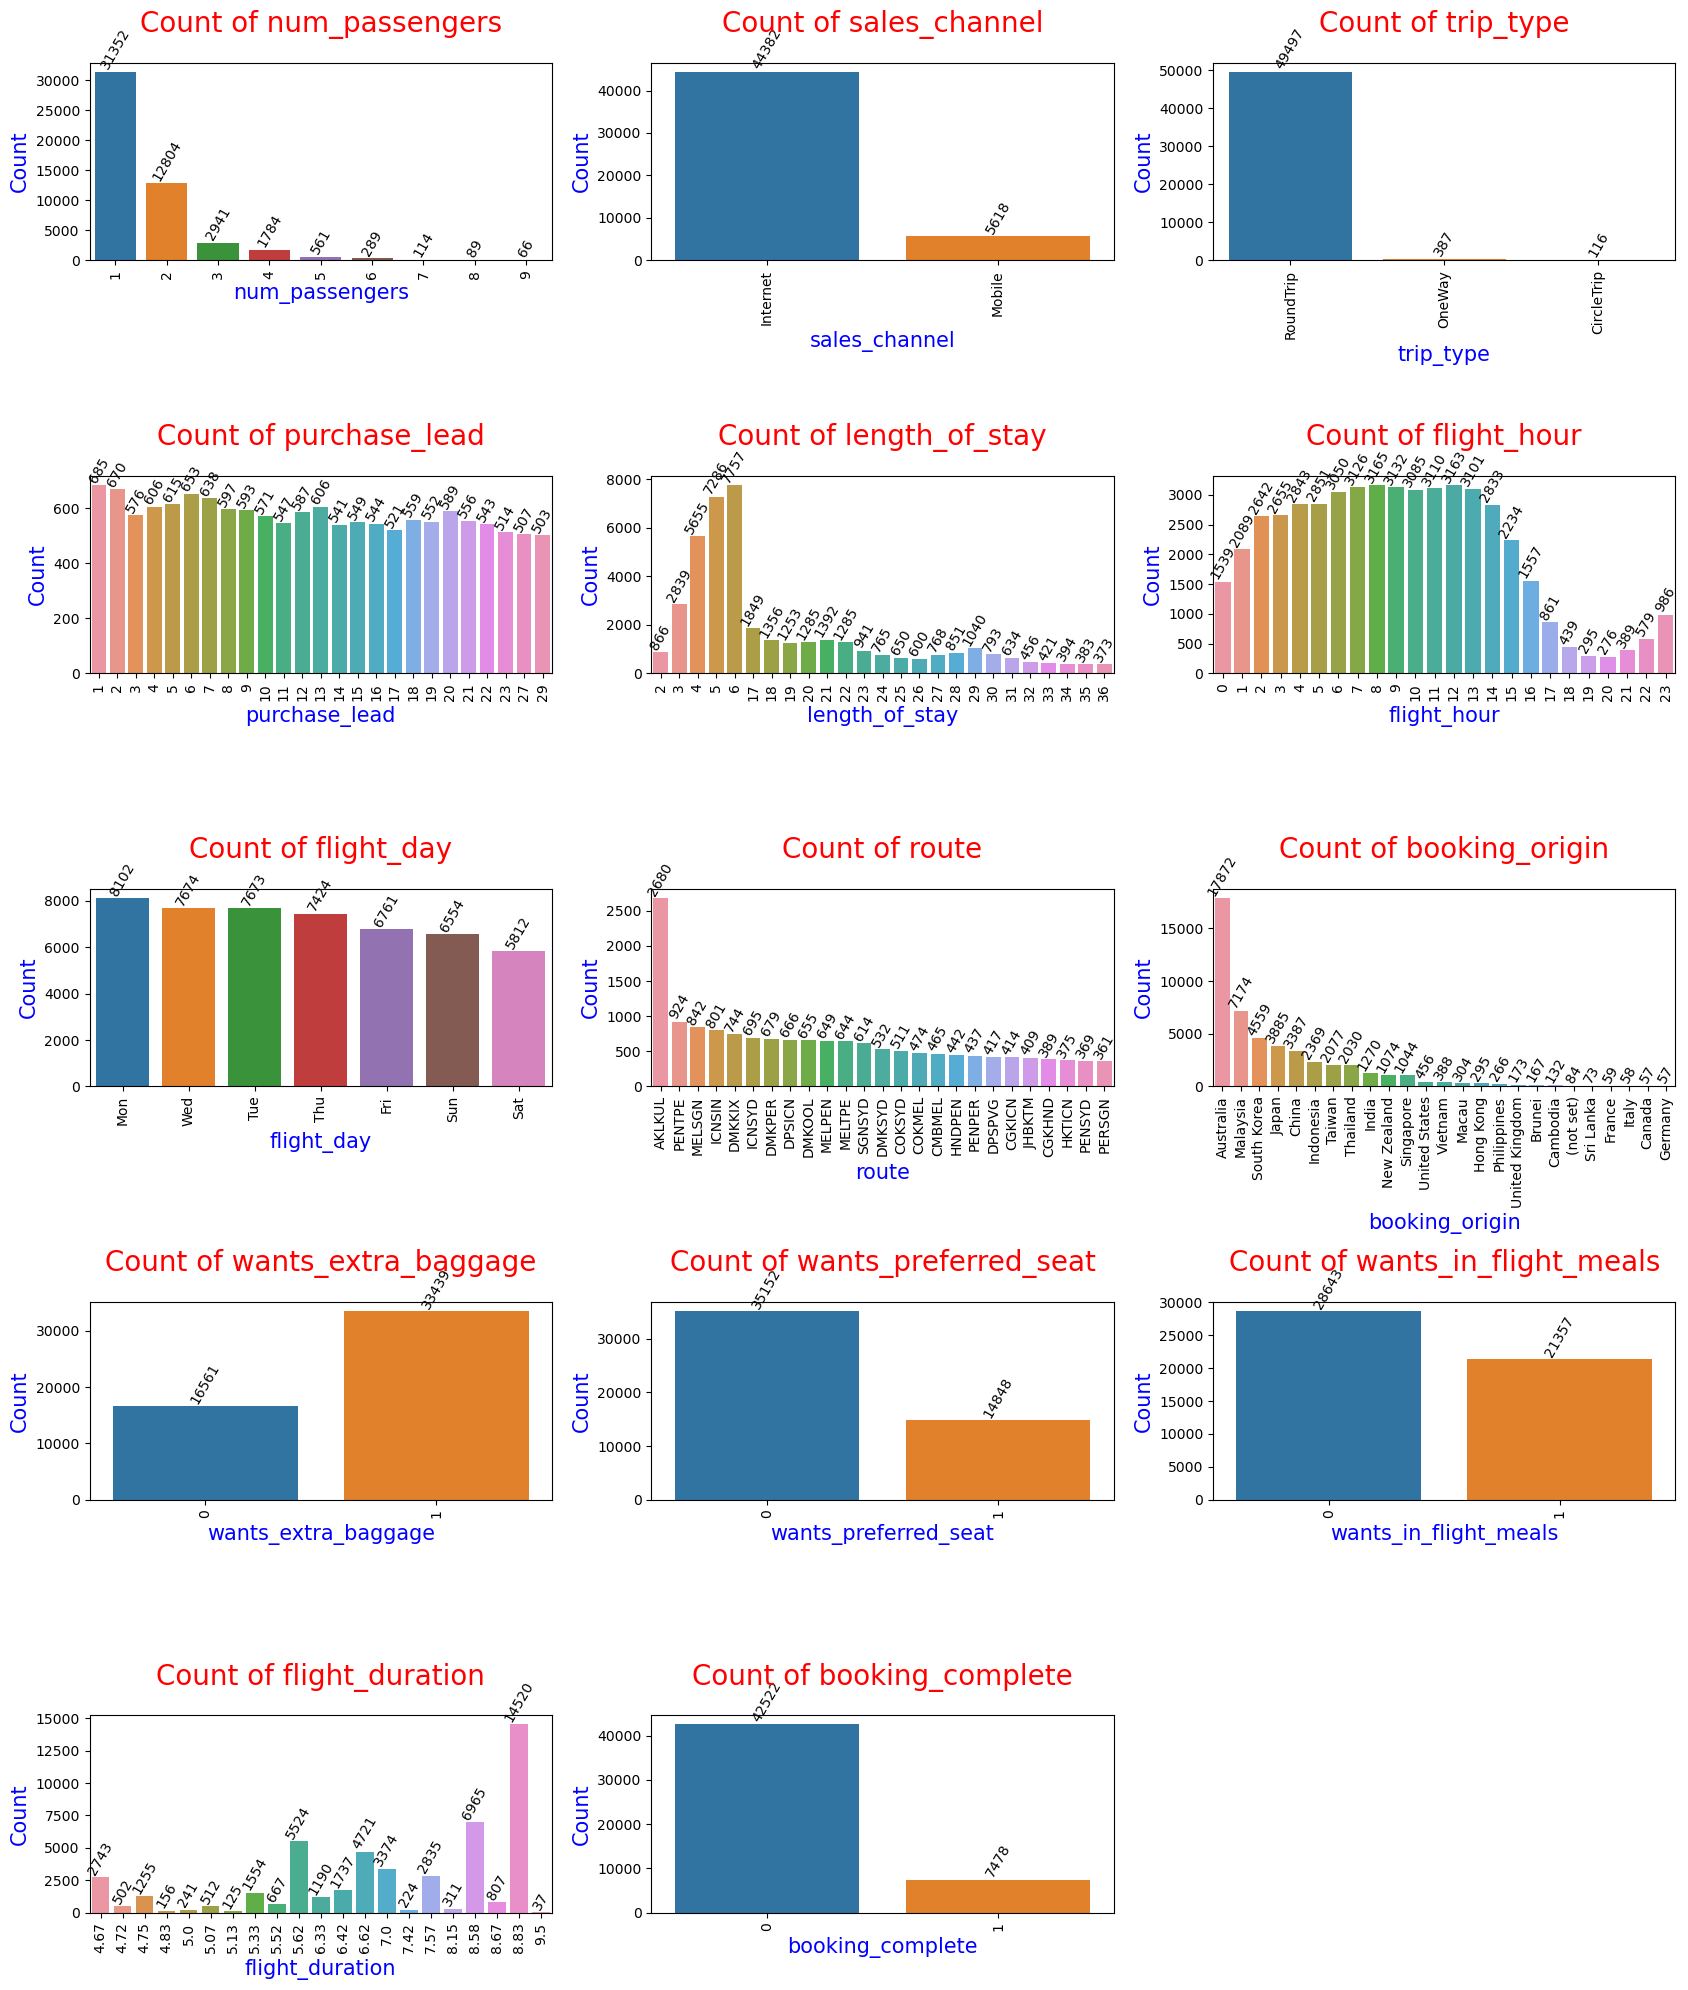

In [12]:
# count_cols=df.drop(['flight_duration','purchase_lead','length_of_stay'], axis=1).columns
count_cols=df.columns

# # Plot countplots for categorical columns
plt.figure(figsize=(17,20))
pltnum = 1

# Plotting count plots for categorical columns
for col in count_cols:
    if pltnum <= len(count_cols):
        ax = plt.subplot(5,3, pltnum)
        s=sns.barplot(x=df[col].value_counts().nlargest(25).index, y=df[col].value_counts().nlargest(25), errorbar=None, data=df)
        s.bar_label(ax.containers[0], fontsize=10, rotation=60)
        plt.xlabel(col, fontsize=15, color='blue')
        plt.ylabel('Count', fontsize=15, color='blue')
        plt.title(f'Count of {col}', fontsize=20, color='red', pad=22)
        plt.xticks(rotation=90)
    pltnum += 1

plt.tight_layout()
plt.show()

## Insights for each of the count plots (for 25 largest values):

---

### 1. **Count of `num_passengers`:**
   - Most bookings are made for **1 or 2 passengers**, with very few bookings for larger groups. This suggests that solo travelers and couples dominate the dataset. Marketing efforts could focus on these types of customers, with group discounts or family packages for those booking more than two passengers.

---

### 2. **Count of `sales_channel`:**
   - The vast majority of bookings are made through the **Internet**, with **Mobile** accounting for a much smaller proportion of bookings. This suggests that most users prefer using web-based platforms to make their bookings. Improving the mobile booking experience might help capture more users from that channel.

---

### 3. **Count of `trip_type`:**
   - The majority of bookings are for **RoundTrip** journeys, with much fewer bookings for **OneWay** and **CircleTrip** options. This indicates that the platform or airline primarily serves customers looking for round-trip travel, and there may be an opportunity to enhance marketing for one-way or complex journeys.

---

### 4. **Count of `purchase_lead`:**
   - The number of days between the booking and the actual flight (`purchase_lead`) is distributed evenly for shorter lead times, but longer lead times (above 90 days) drop significantly. This suggests that most customers are booking within 3 months of their flight, with very few planning far in advance. This information could be useful for timing promotions.

---

### 5. **Count of `length_of_stay`:**
   - Most customers stay for a relatively short duration, with the highest counts around **1-7 days**. This could reflect the nature of the travelers, with many taking short trips or vacations. There are very few long-term stays, indicating that the airline serves a customer base interested in shorter trips.

---

### 6. **Count of `flight_hour`:**
   - Flight departures are relatively spread across the day, but there is a notable peak between **6 AM and 10 AM**, indicating a preference for morning flights. There is also another, smaller peak in the late evening between **6 PM and 9 PM**. Airlines could consider offering more flights during these hours to meet demand.

---

### 7. **Count of `flight_day`:**
   - Bookings are fairly evenly distributed across the days of the week, with **Monday** and **Thursday** having slightly higher counts. This suggests that travelers don’t have a strong preference for a specific day of the week, though certain days are slightly more popular for travel.

---

### 8. **Count of `route`:**
   - A small number of routes account for a large proportion of bookings, with routes like **AKLDEL**, **AKLKUL**, and **AKLSIN** being the most popular. Many other routes have significantly fewer bookings. Airlines might consider optimizing these popular routes and exploring reasons why less popular routes see fewer bookings.

---

### 9. **Count of `booking_origin`:**
   - **Australia** has the highest number of bookings by far, followed by **New Zealand**, **India**, and **Malaysia**. This indicates that the majority of bookings originate from these regions, providing a clear target market for promotional efforts and customer retention strategies.

---

### 10. **Count of `wants_extra_baggage`:**
   - A majority of customers do **not** opt for extra baggage, but a significant portion (about 40%) do. This indicates an opportunity for upselling, as many customers are willing to purchase additional baggage. Airlines could offer special baggage packages or promotions to incentivize more customers to opt for extra baggage.

---

### 11. **Count of `wants_preferred_seat`:**
   - Most customers do not select a preferred seat, with a smaller but significant portion choosing this option. This suggests that while many customers don't feel the need to select a seat, there is a subset of customers who value this service. Airlines could focus on promoting preferred seating, especially to frequent flyers or business travelers.

---

### 12. **Count of `wants_in_flight_meals`:**
   - The distribution of in-flight meal preferences is fairly even, with a slight majority of customers opting for no in-flight meals. However, nearly half of the customers do opt for in-flight meals, suggesting that this is an important add-on service for many travelers. This is another area where airlines could offer customizable meal options or package deals to increase customer satisfaction and revenue.

---

### 13. **Count of `flight_duration`:**
   - The majority of flights are of relatively short duration (between **4-7 hours**), with very few flights longer than 9 hours. This could indicate that the majority of bookings are for short- to medium-haul flights. The airline might focus on optimizing services for these types of routes, while also exploring opportunities for long-haul flights.

---

### 14. **Count of `booking_complete`:**
   - A large portion of bookings are not completed, with only around **15%** of bookings actually being completed. This indicates a significant drop-off in the booking process and highlights the need for conversion optimization strategies. Understanding why customers are abandoning their bookings could provide valuable insights into improving the overall user experience and boosting conversion rates.

---

### Summary:
- **Customer Base:** Most bookings are for solo travelers or couples, with short trips of 1-7 days and short-to-medium haul flights (4-7 hours).
- **Popular Routes and Origins:** Bookings are concentrated around a few popular routes and primarily originate from countries like Australia and New Zealand.
- **Upsell Opportunities:** There are significant opportunities to upsell services like extra baggage, preferred seating, and in-flight meals, as many customers opt for these additional services.
- **Booking Completion Issue:** The low booking completion rate suggests that there is room for improvement in the booking process, and airlines should investigate why customers are dropping off before completing their bookings.


In [14]:
df['booking_complete'].value_counts(normalize=True)

booking_complete
0    0.85044
1    0.14956
Name: proportion, dtype: float64

Out of 50000, only 14% of the passangers booked ticket. 

Count of values when bookig is done:

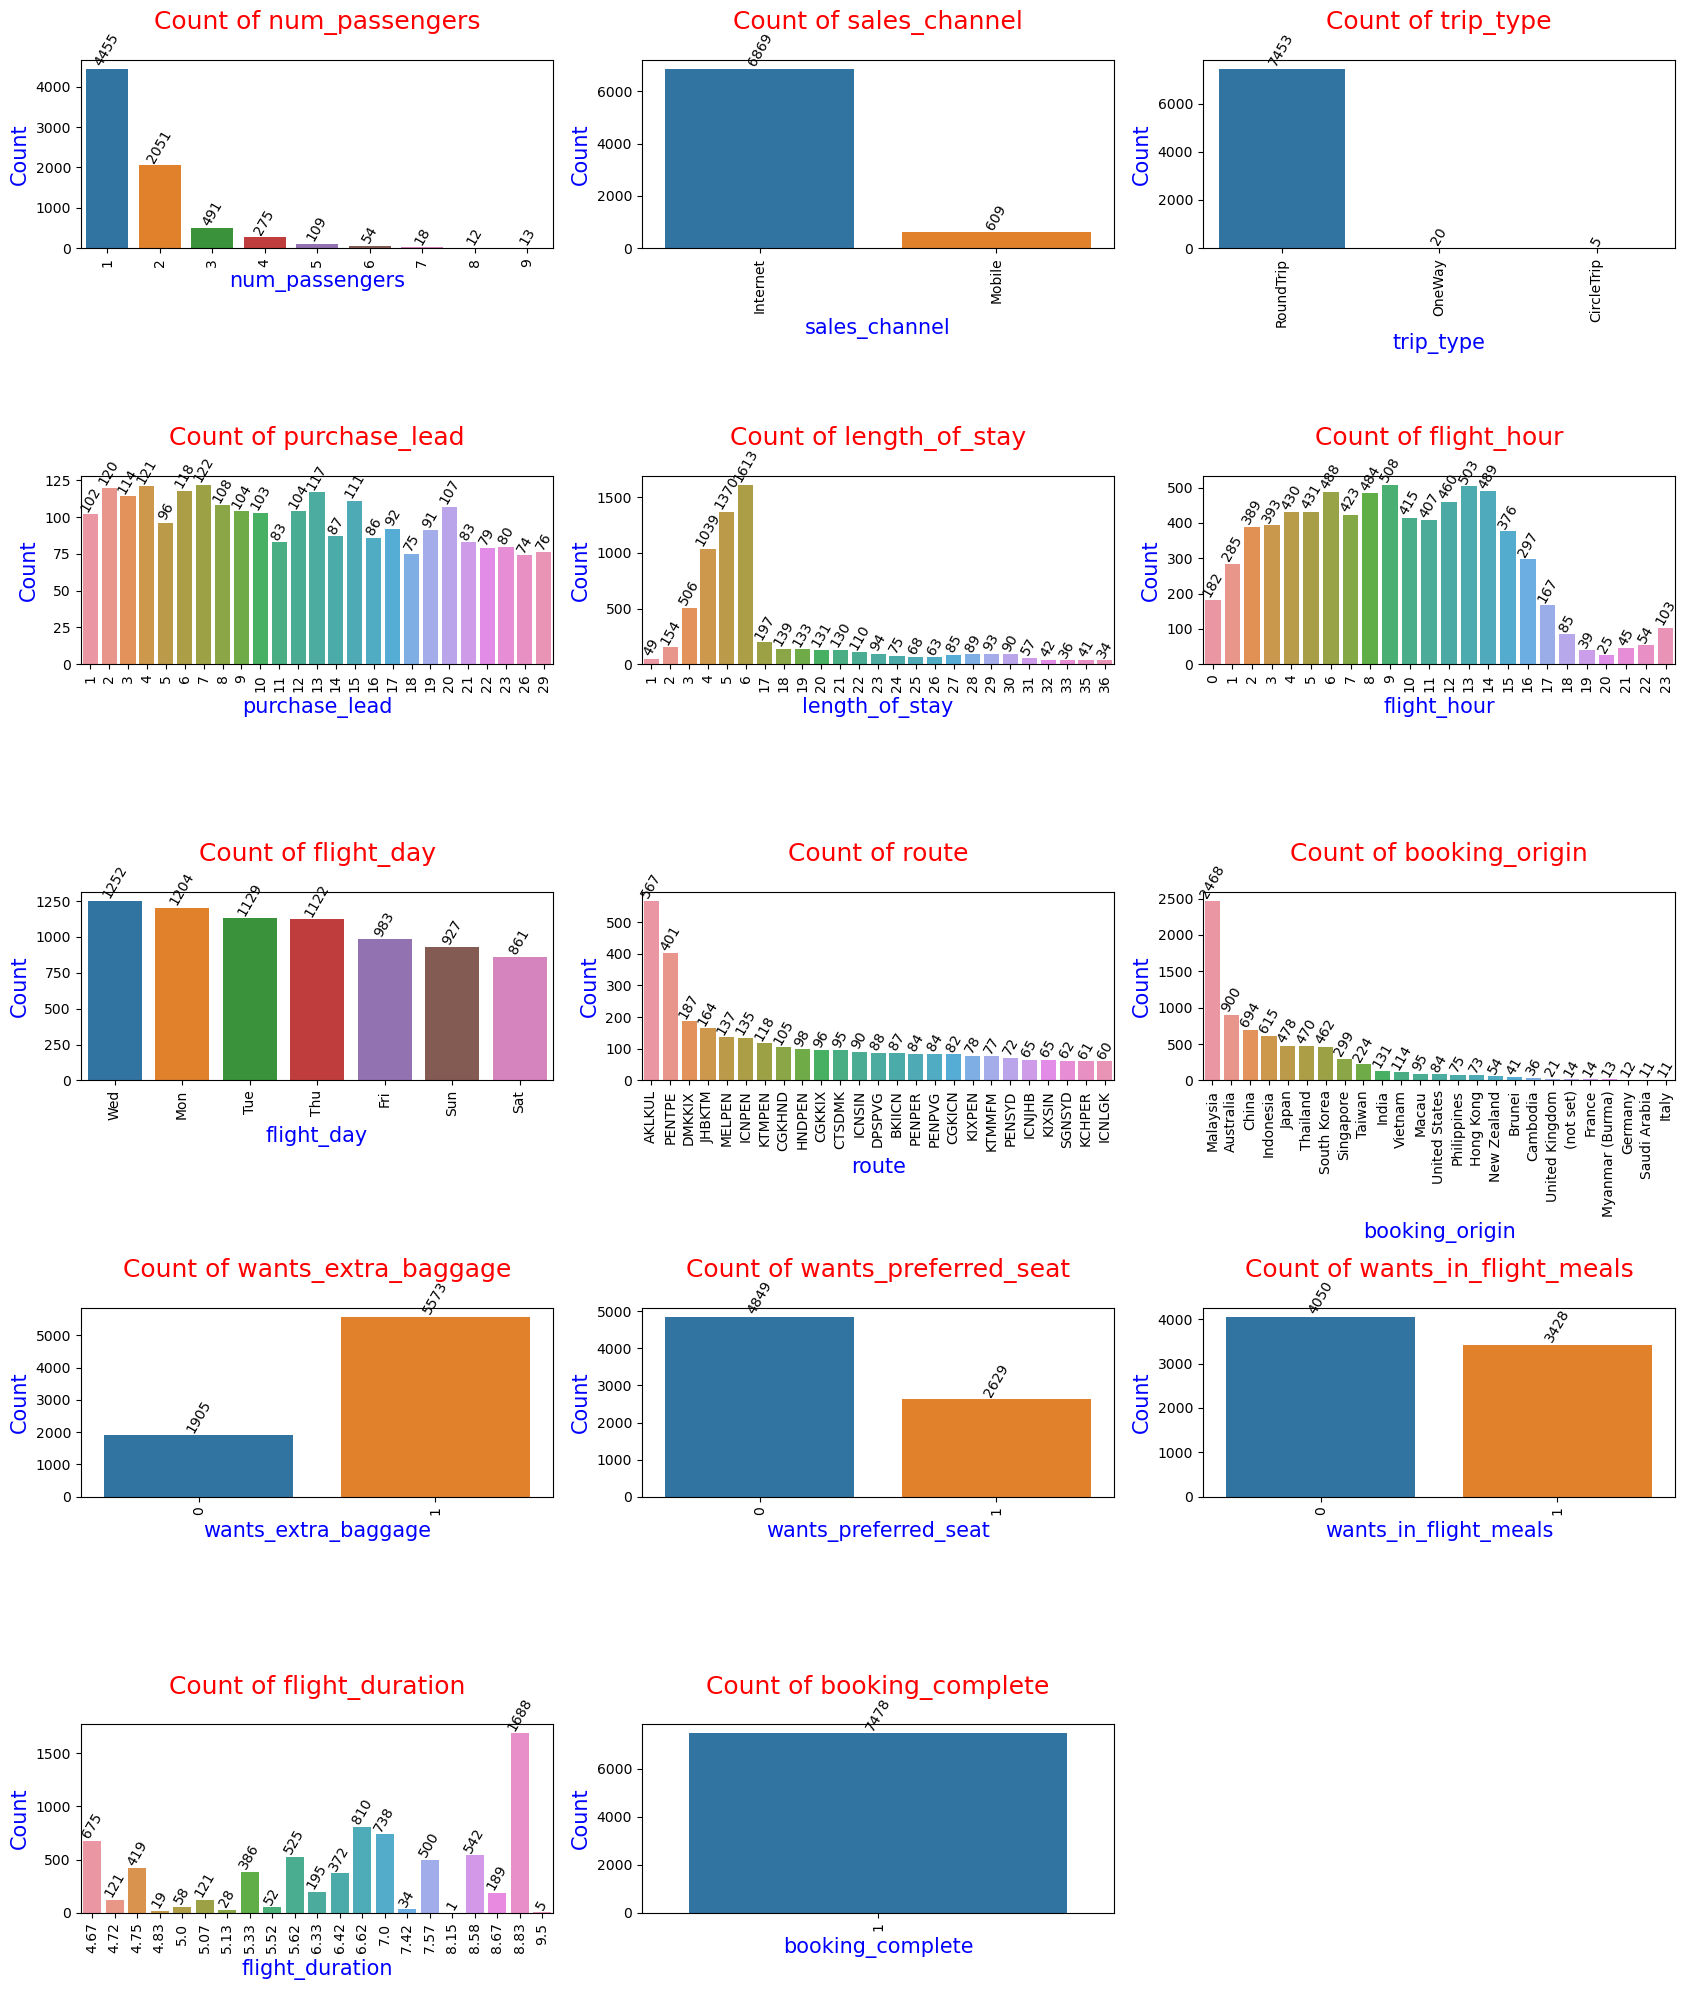

In [15]:
df2=df[df['booking_complete']==1]
count_cols=df2.columns

# # Plot countplots for categorical columns
plt.figure(figsize=(17,20))
pltnum = 1
# Plotting count plots for categorical columns
for col in count_cols:
    if pltnum <= len(count_cols):
        ax = plt.subplot(5,3, pltnum)
        s=sns.barplot(x=df2[col].value_counts().nlargest(25).index, y=df2[col].value_counts().nlargest(25), errorbar=None, data=df2)
        s.bar_label(ax.containers[0], fontsize=10, rotation=60)
        plt.xlabel(col, fontsize=15, color='blue')
        plt.ylabel('Count', fontsize=15, color='blue')
        plt.title(f'Count of {col}', fontsize=18, color='red', pad=22)
        plt.xticks(rotation=90)
    pltnum += 1

plt.tight_layout()
plt.show()

## Insights for each of the count plots (for 25 largest values) filter by completed bookings:

---

### 1. **Count of `num_passengers`:**
   - Most completed bookings are for **1 passenger**, with fewer for 2 passengers and a sharp drop-off for larger groups. Solo travelers are more likely to complete their bookings, while larger groups may be more hesitant.

---

### 2. **Count of `sales_channel`:**
   - Most completed bookings are made through the **Internet**, with far fewer completed bookings made via **Mobile**. The web platform is effective at converting users, while the mobile platform may need improvements to increase completion rates.

---

### 3. **Count of `trip_type`:**
   - **RoundTrip** bookings make up nearly all completed bookings, with almost no completed bookings for **OneWay** or **CircleTrip**. Round-trip journeys are preferred by customers, and there may be less demand for the other trip types.

---

### 4. **Count of `purchase_lead`:**
   - The distribution of purchase lead times (the number of days between booking and flight date) is relatively even for shorter lead times (up to about 30 days), with a decline in completions for longer lead times. Most completed bookings are made close to the flight date, with customers less likely to complete bookings far in advance.

---

### 5. **Count of `length_of_stay`:**
   - Completed bookings are primarily for shorter stays of **1-7 days**, with few customers completing bookings for longer stays. Customers are more likely to complete bookings for short trips or vacations.

---

### 6. **Count of `flight_hour`:**
   - Completed bookings are spread across the day, but most bookings are for flights departing between **6 AM and 10 AM**. Another smaller peak is between **6 PM and 9 PM**, indicating a preference for flights during these time periods.

---

### 7. **Count of `flight_day`:**
   - Completed bookings are fairly evenly distributed across the days of the week, with slightly higher counts for **Monday** and **Thursday**. Customers complete bookings consistently throughout the week, with no strong preference for any particular day.

---

### 8. **Count of `route`:**
   - A few routes dominate completed bookings, particularly **AKLDEL**, **AKLKUL**, and **AKLSIN**. Many other routes have very few completed bookings, suggesting that customers prefer specific travel routes, which could be prioritized in marketing or operations.

---

### 9. **Count of `booking_origin`:**
   - **Australia** leads in the number of completed bookings, followed by **New Zealand** and **India**. Most completed bookings originate from these countries, making them prime markets for targeted promotions or offers to boost completion rates.

---

### 10. **Count of `wants_extra_baggage`:**
   - A significant portion of completed bookings include extra baggage, with about 40% of customers opting for it. Customers who complete bookings are likely to purchase extra baggage, presenting an opportunity to further upsell this service.

---

### 11. **Count of `wants_preferred_seat`:**
   - A substantial number of customers who complete bookings do not select a preferred seat, but about 30-40% do. Offering promotions or incentives for seat selection could encourage more customers to choose preferred seating, leading to higher revenue and customer satisfaction.

---

### 12. **Count of `wants_in_flight_meals`:**
   - A slight majority of customers do not opt for in-flight meals when completing bookings, but a large portion (around 40%) does. This presents another opportunity for upselling, as many customers are willing to pay for meal services.

---

### 13. **Count of `flight_duration`:**
   - The majority of completed bookings are for flights lasting **4-7 hours**, which likely corresponds to medium-haul international flights. There are fewer completions for very short or long flights, suggesting that customers are more likely to complete bookings for medium-duration flights.

---

### 14. **Count of `booking_complete`:**
   - The count plot shows the total number of completed bookings versus non-completed bookings, highlighting the need for optimizing the user experience to improve the overall booking completion rate. With only about **15%** of all bookings being completed, there is significant potential for increasing conversions.

---

### **Summary of Findings:**
- **Traveler Type:** Solo travelers and customers booking round-trip journeys are the most likely to complete bookings.
- **Time of Flight:** Morning and evening flights are the most popular for completed bookings, with preferences for flights between **6 AM - 10 AM** and **6 PM - 9 PM**.
- **Preferred Routes:** Certain routes like **AKLDEL** and **AKLKUL** dominate completed bookings, while many other routes see fewer completions.
- **Add-On Services:** There are substantial opportunities for upselling extra baggage, preferred seats, and in-flight meals, as a large portion of customers who complete bookings opt for these services.
- **Booking Origin:** Most completed bookings come from **Australia**, **New Zealand**, and **India**, indicating that these markets should be prioritized for promotional offers.

---

In [16]:
for i in cat_cols.drop(['flight_day','route','booking_origin']):
    print(f"Unique values in column '{i}': {df[i].unique()}")

Unique values in column 'sales_channel': ['Internet' 'Mobile']
Unique values in column 'trip_type': ['RoundTrip' 'CircleTrip' 'OneWay']
Unique values in column 'flight_hour': [ 7  3 17  4 15 20  6 14 12  2 19 10  8 23  9 13 11  0  1  5 16 18 22 21]
Unique values in column 'wants_extra_baggage': [1 0]
Unique values in column 'wants_preferred_seat': [0 1]
Unique values in column 'wants_in_flight_meals': [0 1]
Unique values in column 'booking_complete': [0 1]


In [17]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [18]:
# cat_cols.drop(['flight_day','route','booking_origin'])

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le=LabelEncoder()

In [21]:
for i in ['sales_channel','trip_type']:
    le=LabelEncoder()
    df[i]=le.fit_transform(df[i])

In [22]:
import category_encoders as ce
# Apply Leave-One-Out Encoding
loo_encoder = ce.LeaveOneOutEncoder(cols=['route', 'booking_origin'])
df[['route', 'booking_origin']] = loo_encoder.fit_transform(df[['route', 'booking_origin']], df['booking_complete'])

In [23]:
for i in cat_cols:
    print(f"Unique values in column '{i}': {df[i].nunique()}")

Unique values in column 'sales_channel': 2
Unique values in column 'trip_type': 3
Unique values in column 'flight_hour': 24
Unique values in column 'flight_day': 7
Unique values in column 'route': 498
Unique values in column 'booking_origin': 86
Unique values in column 'wants_extra_baggage': 2
Unique values in column 'wants_preferred_seat': 2
Unique values in column 'wants_in_flight_meals': 2
Unique values in column 'booking_complete': 2


In [24]:
#After encoding
for i in ['sales_channel','trip_type','flight_day']:
    print(f"Unique values in column '{i}': {df[i].unique()}")

Unique values in column 'sales_channel': [0 1]
Unique values in column 'trip_type': [2 0 1]
Unique values in column 'flight_day': [6 3 4 1 7 2 5]


In [25]:
#Already encoded or numerical categorical columns
for i in ['wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals','booking_complete']:
    print(f"Unique values in column '{i}': {df[i].unique()}")

Unique values in column 'wants_extra_baggage': [1 0]
Unique values in column 'wants_preferred_seat': [0 1]
Unique values in column 'wants_in_flight_meals': [0 1]
Unique values in column 'booking_complete': [0 1]


In [26]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,6,0.000000,0.050326,1,0,0,5.52,0
1,1,0,2,112,20,3,6,0.000000,0.050326,0,0,0,5.52,0
2,2,0,2,243,22,17,3,0.000000,0.103231,1,1,0,5.52,0
3,1,0,2,96,31,4,6,0.000000,0.050326,0,0,1,5.52,0
4,2,0,2,68,22,15,3,0.000000,0.103231,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,2,27,6,9,6,0.059091,0.050361,1,0,1,5.62,0
49996,1,0,2,111,6,4,7,0.059091,0.050361,0,0,0,5.62,0
49997,1,0,2,24,6,22,6,0.059091,0.050361,0,0,1,5.62,0
49998,1,0,2,15,6,11,1,0.059091,0.050361,1,0,1,5.62,0


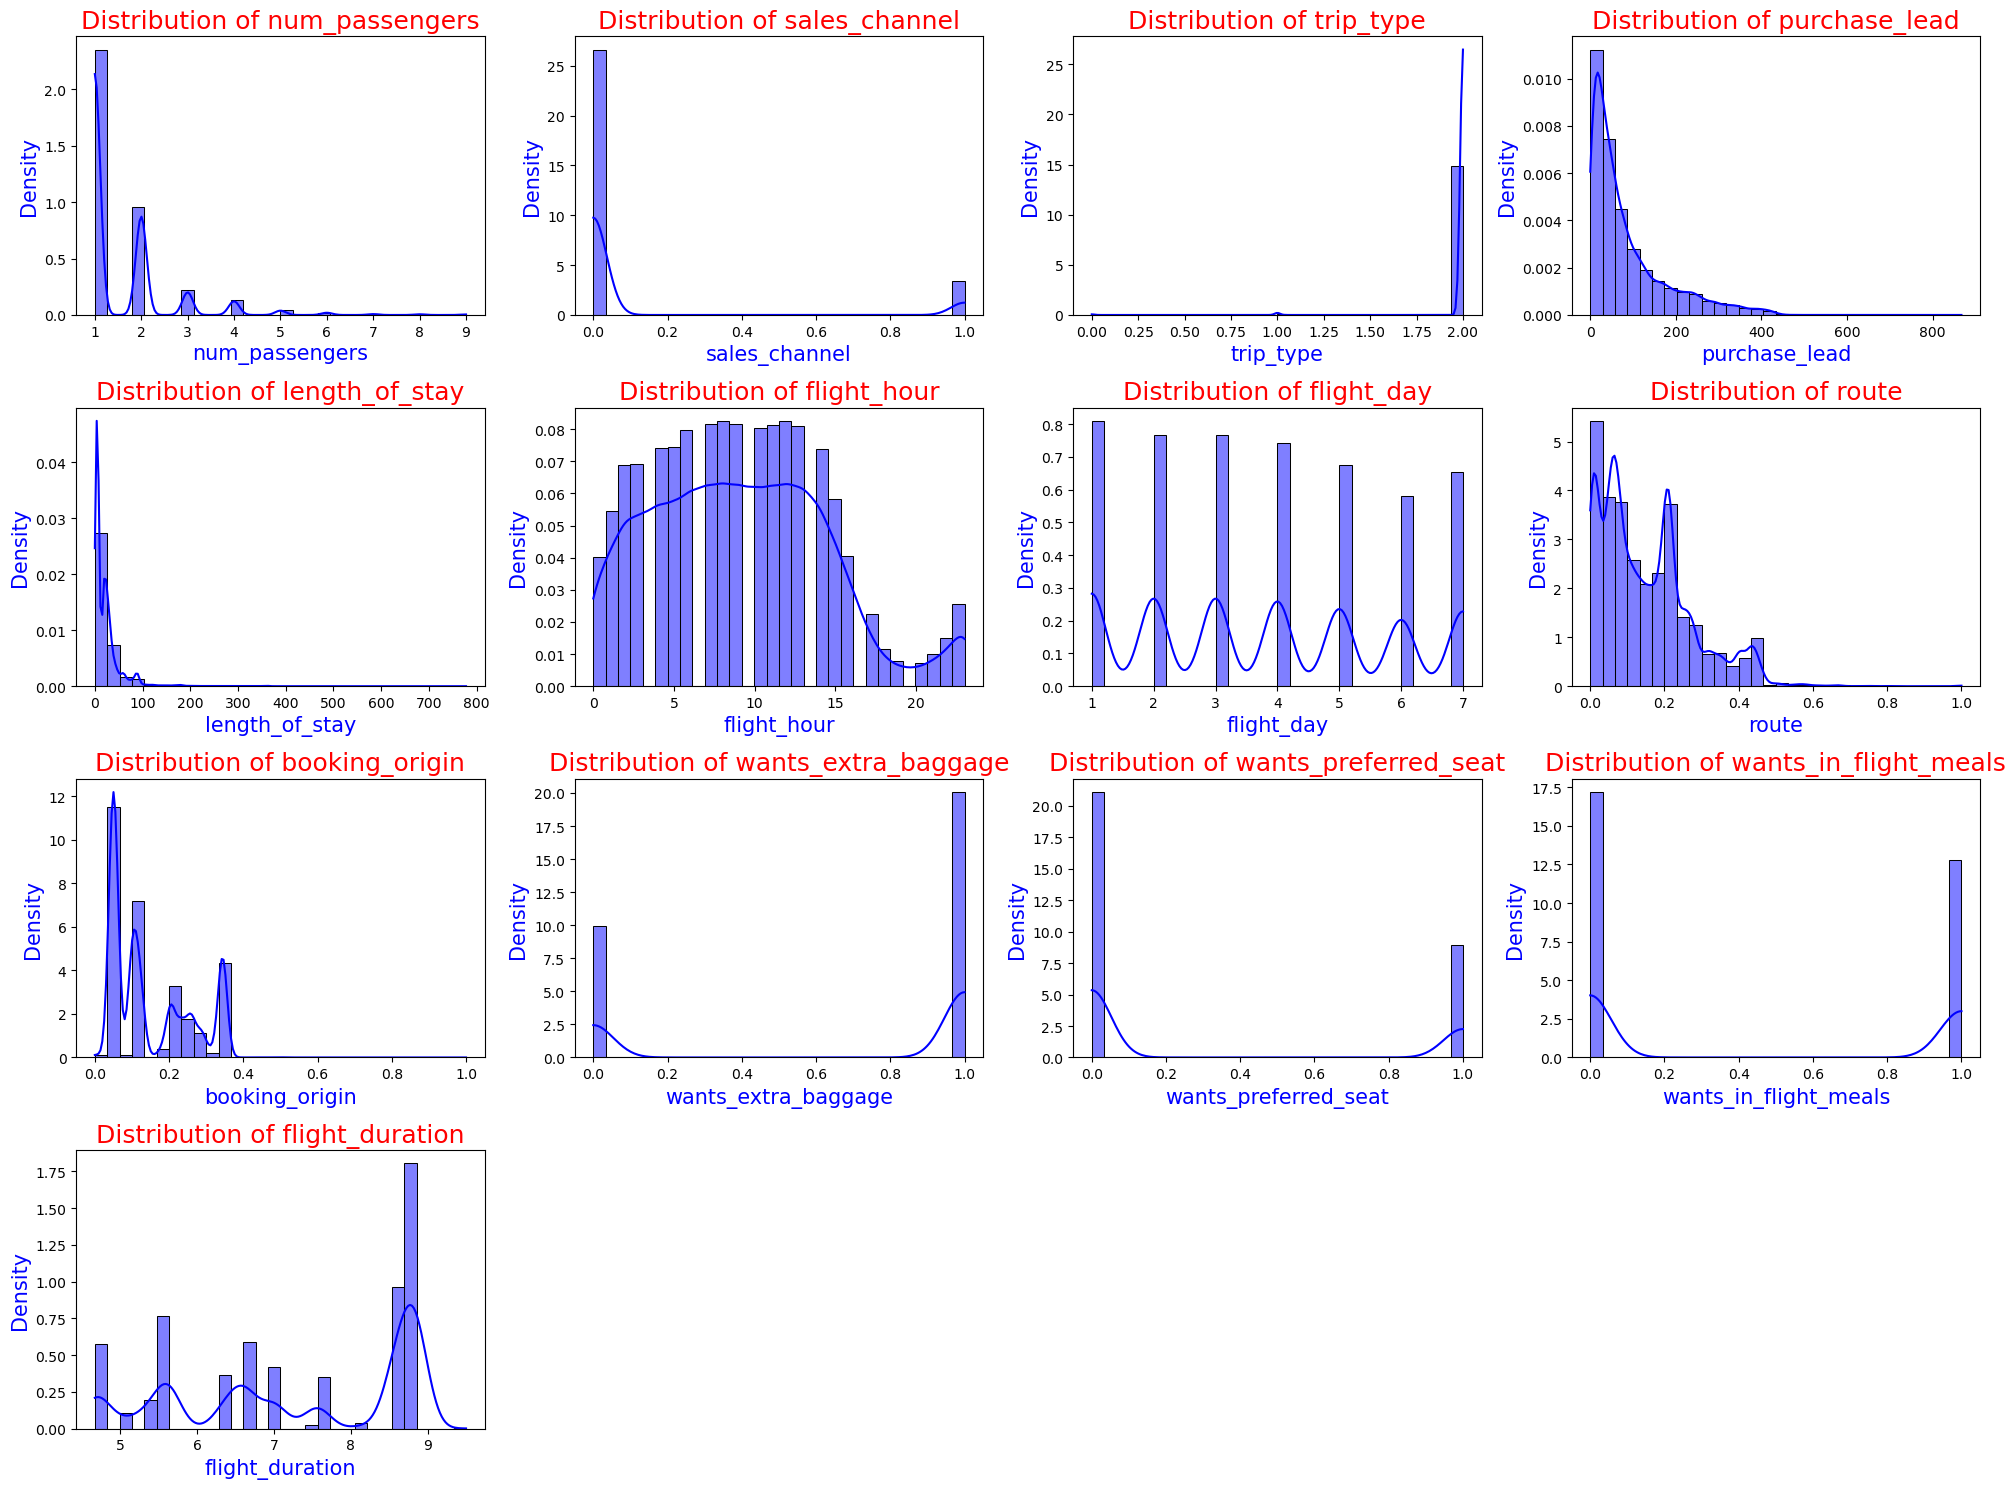

In [27]:
# Plot distribution of numerical columns
plt.figure(figsize=(20, 15))
plot_num = 1
for col in df.drop('booking_complete',axis=1).columns:
    if plot_num <= 14:
        plt.subplot(4, 4, plot_num)
        sns.histplot(df[col], kde=True, color='blue', stat="density", bins=30, edgecolor='black')
        plt.xlabel(col, fontsize=15, color='blue')
        plt.ylabel('Density', fontsize=15, color='blue')
        plt.title(f'Distribution of {col}',fontsize=18, color='red')
    plot_num += 1
plt.tight_layout()
plt.show()

## Insights for each of the distribution plots:

Here is the updated text with the word "Insight" removed after every headline:

---

### 1. **Distribution of `num_passengers`:**
   - The majority of bookings are for 1 passenger, with a smaller peak for 2 passengers. There are very few bookings with 3 or more passengers, indicating that most travelers are solo or in pairs. This distribution is highly skewed to the right, with a long tail for larger group bookings.

---

### 2. **Distribution of `sales_channel`:**
   - The distribution shows that almost all bookings are made through one dominant sales channel (likely the **Internet** as seen in previous plots), with very few bookings through the secondary channel (likely **Mobile**). The right-skewed distribution shows that mobile is underutilized for bookings.

---

### 3. **Distribution of `trip_type`:**
   - The distribution is dominated by a single value, suggesting that nearly all bookings are of one particular trip type (likely **RoundTrip**). The other trip types, such as **OneWay** and **CircleTrip**, occur very infrequently.

---

### 4. **Distribution of `purchase_lead`:**
   - The **purchase lead time** (i.e., the number of days between booking and the flight) is highly skewed to the right. Most bookings are made well in advance (with a peak around a low number of days), but there are also a few outliers where customers book their flights several hundred days in advance. Last-minute bookings are less common.

---

### 5. **Distribution of `length_of_stay`:**
   - This distribution is right-skewed, indicating that most travelers have relatively short stays (with peaks at shorter durations) but a few outliers stay for a very long time. The tail of the distribution suggests that a small portion of customers have stays lasting several hundred days, which could represent special cases like long-term travel or relocation.

---

### 6. **Distribution of `flight_hour`:**
   - Flight departures are spread fairly evenly across different hours of the day, though there is a noticeable dip in the early morning hours (around midnight to 5 AM). There is a slight peak between **6 AM and 11 AM**, suggesting that these are popular departure times. Another smaller peak occurs around **6 PM to 9 PM**, showing an evening preference for travel.

---

### 7. **Distribution of `flight_day`:**
   - The distribution shows that flights are fairly evenly distributed across all days of the week, but there are regular peaks and troughs for each day. No one day seems to be heavily preferred over others, though there may be slight variations in travel demand on specific days.

---

### 8. **Distribution of `route`:**
   - The distribution is right-skewed, indicating that a small number of routes account for the majority of bookings, while many routes have significantly fewer bookings. This suggests a concentration of demand on key travel routes.

---

### 9. **Distribution of `booking_origin`:**
   - The distribution shows a few peaks where bookings originate from specific countries (likely **Australia** and **New Zealand**, as seen in previous plots). The rest of the origins have much lower frequencies, indicating that certain countries dominate the origin of bookings.

---

### 10. **Distribution of `wants_extra_baggage`:**
   - The majority of customers do **not** opt for extra baggage, with a small percentage choosing it. The skewed distribution suggests that offering additional baggage as an upsell could be an opportunity for further revenue.

---

### 11. **Distribution of `wants_preferred_seat`:**
   - Similar to extra baggage, most customers do not opt for a preferred seat, though a small portion does. The skewed distribution suggests that there could be room to promote the preferred seat option more effectively.

---

### 12. **Distribution of `wants_in_flight_meals`:**
   - The distribution shows that a significant portion of customers do opt for in-flight meals, although a slight majority does not. This suggests an opportunity to upsell meal services, as a sizable number of customers already value the option.

---

### 13. **Distribution of `flight_duration`:**
   - The distribution of flight duration is multimodal, with several peaks. This suggests that there are clusters of flights of specific durations, possibly corresponding to popular domestic or international routes. The peak around 5-6 hours may represent medium-haul international flights, while the peak near 9 hours could indicate long-haul international routes.

---

### 14. **Distribution of `booking_complete`:**
   - The distribution is heavily skewed toward incomplete bookings, with very few completed bookings. This indicates a significant drop-off in the booking process, highlighting the need to focus on improving the booking experience to increase completion rates.

---

### **Summary:**
- **Skewness in Data:** Many distributions are right-skewed, particularly for variables like `num_passengers`, `purchase_lead`, and `length_of_stay`, indicating that most values are clustered around a few low values with long tails.
- **Potential for Upselling:** There is potential for upselling additional services such as extra baggage, preferred seating, and in-flight meals, as a minority of customers currently opt for these services.
- **Booking Behavior:** Most customers book flights well in advance, travel on popular routes, and do not complete the booking process, suggesting that there is room to optimize the booking funnel for better conversions.

---

Based on the descriptions of the columns (`num_passengers`, `purchase_lead`, `length_of_stay`, and `flight_duration`), and after analyzing the distribution plots, here are methods for handling skewness and the rationale behind each method:

### 1. **For `num_passengers` (Discrete with 9 unique values, positively skewed):**
   - **Recommendation:** Since the `num_passengers` column has only 9 unique discrete values, a transformation like **square root** would be a better option.
     - **Why Square Root?**: The square root transformation works well for discrete values with moderate skewness, and it preserves the discrete nature of the data. Additionally, for columns with few unique values, log transformation may not work well because the data is already in a small range.
   
### 2. **For `purchase_lead` (Discrete with 470 unique values, positively skewed):**
   - **Recommendation:** **Log transformation** is the best method to handle this type of skewness.
     - **Why Log Transformation?**: Log transformation is effective for highly skewed data, especially for positively skewed continuous or discrete data with a large number of unique values. It compresses the long right tail, making the distribution more normal.

### 3. **For `length_of_stay` (Discrete with 335 unique values, positively skewed):**
   - **Recommendation:** **Log transformation** or **Box-Cox transformation** would be the best methods.
     - **Why Log/Box-Cox?**: Both transformations handle right skewness well. However, since Box-Cox can adjust the power parameter to fit the data, it could sometimes perform better than a simple log transformation. But if you want simplicity and the data is strictly positive, log transformation will suffice.

### 4. **For `flight_duration` (Discrete with 21 unique values, shows peaks and valleys):**
   - **Recommendation:** **No transformation** is needed for `flight_duration`.
     - **Why No Transformation?**: The rise and fall seen in the distribution may not necessarily be skewness but could reflect the nature of the flights (e.g., different flight durations for domestic vs. international flights). Applying a transformation here might distort the meaning of the data. It's best to leave it as is for interpretation.

### Summary of Suggested Transformations:
- **`num_passengers`**: Square Root Transformation
- **`purchase_lead`**: Log Transformation
- **`length_of_stay`**: Log Transformation (or Box-Cox if flexibility is needed)
- **`flight_duration`**: No transformation


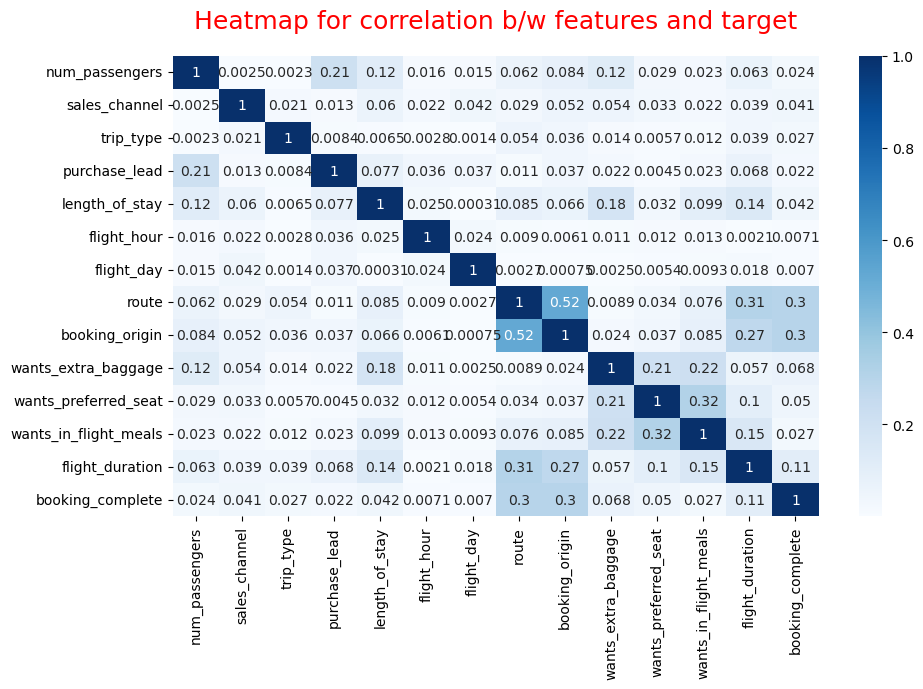

In [28]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr().abs(),annot=True,cmap='Blues', annot_kws={'size':10})

plt.title('Heatmap for correlation b/w features and target',fontsize=18, color='red',pad=20)
plt.tight_layout()

## Insights on Features with Multicollinearity and Impact on the Target (`booking_complete`):

#### **1. Multicollinearity in Features:**
Multicollinearity refers to the high correlation between two or more independent variables. In the heatmap, some features show high correlation with each other, which could indicate multicollinearity.

- **`route` and `booking_origin` (0.52):**
  - There is a strong correlation between these two features, suggesting that certain routes are closely tied to specific booking origins.
  
- **`route` and `flight_duration` (0.31):**
  - This correlation is moderate, indicating that certain routes are associated with specific flight durations. For example, longer routes may naturally correspond to longer flight times.

- **`wants_preferred_seat` and `wants_in_flight_meals` (0.32):**
  - There is moderate correlation between customers opting for preferred seats and in-flight meals, suggesting that customers who purchase one service are likely to purchase another.

- **`wants_preferred_seat` and `wants_extra_baggage` (0.21):**
  - A smaller correlation between selecting preferred seats and extra baggage indicates that customers opting for one additional service might opt for others as well.

#### **2. Impact on the Target (`booking_complete`):**
Several features have some level of correlation with the target variable (`booking_complete`), though none have particularly strong correlations:

- **Features with Higher Positive Impact on `booking_complete`:**
  - **`route` (0.31):** The strongest positive correlation with the target. This suggests that the route significantly influences whether a booking is completed, likely because certain routes are more attractive or more commonly completed.
  - **`flight_duration` (0.11):** Longer flight durations have a moderate positive correlation with completed bookings, indicating that customers booking longer flights are more likely to complete their bookings.
  - **`wants_preferred_seat` (0.05):** Customers who opt for preferred seating may be slightly more likely to complete their booking.
  - **`wants_in_flight_meals` (0.05):** Similarly, customers opting for in-flight meals also show a slight positive correlation with completed bookings.

- **Features with Minimal or Negative Impact on `booking_complete`:**
  - **`num_passengers` (-0.024):** There is a very slight negative correlation, suggesting that the number of passengers has little to no effect on whether a booking is completed.
  - **`sales_channel` (0.041):** The sales channel (internet vs. mobile) shows very little correlation with booking completion, implying that the platform used for booking has little influence.
  - **`flight_day` (0.007):** The day of the week has almost no correlation with booking completion, indicating that it doesn’t matter much which day the flight is scheduled for in terms of completion likelihood.

---

#### **3. Recommended Features to Drop:**
Based on the above insights, here’s a recommendation for which features to drop, considering both **multicollinearity** and their **impact on the target**:

- **Drop `booking_origin` (0.11)**:
  - Since `booking_origin` is highly correlated with `route` (0.52) and has less correlation with `booking_complete` (0.11), it would be a good candidate for removal. The `route` feature captures more of the impact on the target variable while `booking_origin` adds redundancy and doesn’t contribute as much.

- **Drop `wants_extra_baggage` (0.04)**:
  - Even though this feature is correlated with `length_of_stay` (0.18), its correlation with `booking_complete` is minimal (0.04). This makes it a good candidate for removal as it contributes little to predicting booking completions.

---

### **Summary of Recommendations:**
- **Keep `route`**: It has the strongest correlation with `booking_complete` and should be retained.
- **Keep `flight_duration`**: It has a moderate correlation with `booking_complete` and captures important information about the nature of the flight.
- **Drop `booking_origin`**: It has multicollinearity with `route` and contributes less to the prediction of booking completions.
- **Drop `wants_extra_baggage`**: It has a very low impact on the target and could be safely removed.


In [29]:
#Remove skewness for num_passengers, purchase_lead, and length_of_stay
import numpy as np
from scipy import stats

# Apply Square Root Transformation for num_passengers
df['num_passengers_sqrt'] = np.sqrt(df['num_passengers'])

# Apply Log Transformation for purchase_lead (adding 1 to avoid log(0))
df['purchase_lead_log'] = np.log1p(df['purchase_lead'])

# Apply Log Transformation for length_of_stay (adding 1 to avoid log(0))
df['length_of_stay_log'] = np.log1p(df['length_of_stay'])

# Optionally apply Box-Cox Transformation for length_of_stay (only for positive values)
df['length_of_stay_boxcox'], _ = stats.boxcox(df['length_of_stay'] + 1)  # Adding 1 to avoid zero issues

In [30]:
# Dropping 'booking_origin' and 'wants_extra_baggage
df.drop(columns=['booking_origin', 'wants_extra_baggage'], inplace=True)

In [31]:
df[['num_passengers','purchase_lead', 'length_of_stay']].skew()

num_passengers    2.690908
purchase_lead     1.653035
length_of_stay    5.274743
dtype: float64

In [32]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,num_passengers_sqrt,purchase_lead_log,length_of_stay_log,length_of_stay_boxcox
0,2,0,2,262,19,7,6,0.0,0,0,5.52,0,1.414214,5.572154,2.995732,2.102246
1,1,0,2,112,20,3,6,0.0,0,0,5.52,0,1.000000,4.727388,3.044522,2.125020
2,2,0,2,243,22,17,3,0.0,1,0,5.52,0,1.414214,5.497168,3.135494,2.166743
3,1,0,2,96,31,4,6,0.0,0,1,5.52,0,1.000000,4.574711,3.465736,2.310406
4,2,0,2,68,22,15,3,0.0,0,1,5.52,0,1.414214,4.234107,3.135494,2.166743


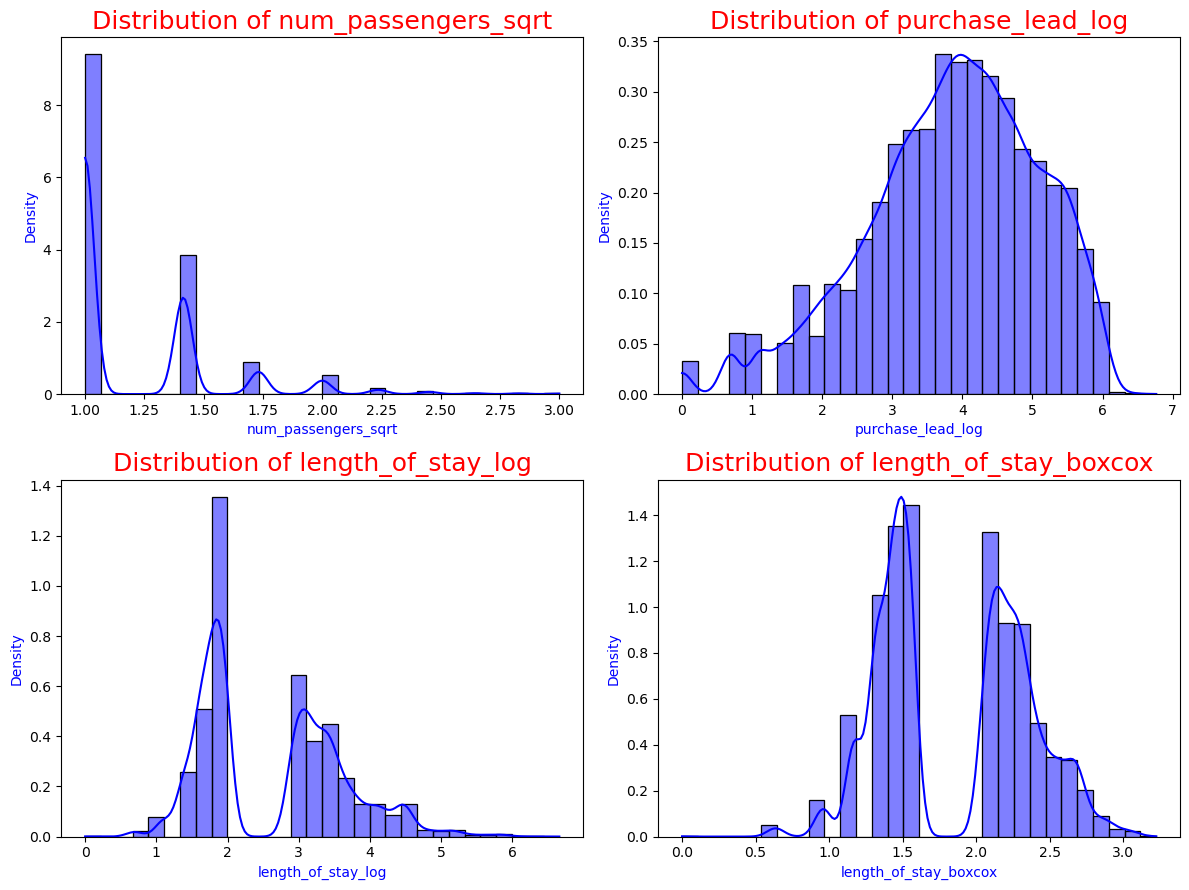

In [33]:
# Plot distribution of numerical columns after transformation
plt.figure(figsize=(12,9))
plot_num = 1
for col in ['num_passengers_sqrt','purchase_lead_log', 'length_of_stay_log','length_of_stay_boxcox']:
    if plot_num <= 14:
        plt.subplot(2, 2, plot_num)
        sns.histplot(df[col], kde=True, color='blue', stat="density", bins=30, edgecolor='black')
        plt.xlabel(col, fontsize=10, color='blue')
        plt.ylabel('Density', fontsize=10, color='blue')
        plt.title(f'Distribution of {col}',fontsize=18, color='red')
    plot_num += 1
plt.tight_layout()
plt.show()

In [34]:
df[['num_passengers_sqrt','purchase_lead_log', 'length_of_stay_log','length_of_stay_boxcox']].skew()

num_passengers_sqrt      1.763374
purchase_lead_log       -0.546915
length_of_stay_log       0.461025
length_of_stay_boxcox    0.097928
dtype: float64

### Regarding `num_passengers_sqrt`:
The distribution and skewness value for `num_passengers_sqrt` still indicate a significant skew (skewness = 1.76), and the distribution plot shows that it remains quite right-skewed. Since `num_passengers` is a discrete column with only 9 unique values, the square root transformation may not have been sufficient to handle the skewness completely.

#### Options for `num_passengers`:
1. **Keep it as is**: Given that `num_passengers` has a small number of unique values, it is a discrete variable representing real-world counts (number of passengers). Since transforming it further may not provide much benefit or meaning, **keeping the square root transformation** as is could be acceptable. The data is already interpretable and doesn't distort the passenger count.

2. **Try Other Methods?**: 
   - **Log transformation** may not be effective here due to the small number of unique values.

**Recommendation:** For now, **keeping it as is (with square root transformation)** seems reasonable because the small number of unique values and the natural interpretation of the data make it less practical to apply more complex transformations.

---

### Regarding `length_of_stay` (Box-Cox vs. Log Transformation):
Considering **Box-Cox** for `length_of_stay` is correct. 

- **Skewness after Box-Cox**: The skewness after applying Box-Cox (0.097928) is much closer to zero, indicating a nearly normal distribution.
- **Log Transformation**: While the log transformation reduced the skewness somewhat, the Box-Cox transformation performed better, as seen both in the skewness value and the distribution plot.

#### Recommendation:
- **Use Box-Cox Transformation** for `length_of_stay`. It resulted in a more normal distribution and lower skewness, which should help the model's performance.

---

### Final Thoughts:
- **For `num_passengers`**: Keep `num_passengers` with **square root** transformation (i.e., `num_passengers_sqrt`), unless further model performance issues arise.
- **For `length_of_stay`**: Keep `length_of_stay` with **Box-Cox** transformation (`length_of_stay_boxcox`), as it clearly performed better in terms of reducing skewness and normalizing the distribution.


In [35]:
df[['num_passengers','purchase_lead','length_of_stay']]=df[['num_passengers_sqrt','purchase_lead_log','length_of_stay_boxcox']]

In [36]:
df.drop(['num_passengers_sqrt','purchase_lead_log','length_of_stay_boxcox'],axis=1, inplace=True)

In [37]:
df.drop(['length_of_stay_log'],axis=1, inplace=True)

In [38]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1.414214,0,2,5.572154,2.102246,7,6,0.0,0,0,5.52,0
1,1.000000,0,2,4.727388,2.125020,3,6,0.0,0,0,5.52,0
2,1.414214,0,2,5.497168,2.166743,17,3,0.0,1,0,5.52,0
3,1.000000,0,2,4.574711,2.310406,4,6,0.0,0,1,5.52,0
4,1.414214,0,2,4.234107,2.166743,15,3,0.0,0,1,5.52,0


In [39]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['booking_complete'],axis=1)
y = df['booking_complete']

In [40]:
X

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,1.414214,0,2,5.572154,2.102246,7,6,0.000000,0,0,5.52
1,1.000000,0,2,4.727388,2.125020,3,6,0.000000,0,0,5.52
2,1.414214,0,2,5.497168,2.166743,17,3,0.000000,1,0,5.52
3,1.000000,0,2,4.574711,2.310406,4,6,0.000000,0,1,5.52
4,1.414214,0,2,4.234107,2.166743,15,3,0.000000,0,1,5.52
...,...,...,...,...,...,...,...,...,...,...,...
49995,1.414214,0,2,3.332205,1.537723,9,6,0.059091,0,1,5.62
49996,1.000000,0,2,4.718499,1.537723,4,7,0.059091,0,0,5.62
49997,1.000000,0,2,3.218876,1.537723,22,6,0.059091,0,1,5.62
49998,1.000000,0,2,2.772589,1.537723,11,1,0.059091,0,1,5.62


In [41]:
y

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: booking_complete, Length: 50000, dtype: int64

In [42]:
import sklearn
import numpy as np

In [43]:
sklearn.__version__

'1.2.2'

In [44]:
np.__version__

'1.24.3'

In [45]:
#!pip uninstall scikit-learn --yes

In [46]:
#!pip install scikit-learn==1.2.2

In [47]:
import sklearn
print(sklearn.__version__)

1.2.2


In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [61]:
X_resampled

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,1.414214,0,2,5.572154,2.102246,7,6,0.000000,0,0,5.520000
1,1.000000,0,2,4.727388,2.125020,3,6,0.000000,0,0,5.520000
2,1.414214,0,2,5.497168,2.166743,17,3,0.000000,1,0,5.520000
3,1.000000,0,2,4.574711,2.310406,4,6,0.000000,0,1,5.520000
4,1.414214,0,2,4.234107,2.166743,15,3,0.000000,0,1,5.520000
...,...,...,...,...,...,...,...,...,...,...,...
85039,1.000000,0,2,3.916360,2.561846,13,7,0.070489,1,1,8.586608
85040,1.000000,0,2,4.200854,2.294995,12,4,0.128895,0,1,8.830000
85041,1.000000,0,2,2.279678,2.339763,2,3,0.327557,0,0,4.750000
85042,1.000000,0,2,2.156668,2.357048,6,4,0.076225,1,0,8.580000


In [62]:
y_resampled

0        0
1        0
2        0
3        0
4        0
        ..
85039    1
85040    1
85041    1
85042    1
85043    1
Name: booking_complete, Length: 85044, dtype: int64

In [66]:
y_resampled.value_counts()

booking_complete
0    42522
1    42522
Name: count, dtype: int64

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [56]:
X_train, X_test, y_train, y_test=train_test_split(X_resampled, y_resampled,  test_size=0.2, random_state=42)

In [59]:
X_train

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,wants_preferred_seat,wants_in_flight_meals,flight_duration
49583,1.732051,0,2,4.356709,1.537723,1,1,0.190367,1,1,5.620000
21093,1.414214,0,2,4.682131,2.410625,2,2,0.129032,0,1,5.620000
24903,1.414214,0,2,3.637586,2.166743,4,6,0.101142,1,1,8.580000
61357,1.374337,0,2,2.012712,1.430082,8,7,0.154446,0,0,7.515126
68442,1.005583,0,2,4.008506,2.145879,6,7,0.098344,1,1,8.583369
...,...,...,...,...,...,...,...,...,...,...,...
6265,2.000000,0,2,4.779123,2.125020,6,5,0.067653,1,1,8.830000
54886,1.000000,0,2,1.977621,1.322782,12,3,0.493340,0,0,4.670000
76820,1.000000,0,2,3.516346,2.151128,5,2,0.347631,0,0,5.295982
860,2.000000,0,2,5.451038,2.102246,8,2,0.211646,0,0,8.830000


In [57]:
y_train

49583    1
21093    0
24903    0
61357    1
68442    1
        ..
6265     0
54886    1
76820    1
860      0
15795    0
Name: booking_complete, Length: 68035, dtype: int64

In [60]:
X_test

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,wants_preferred_seat,wants_in_flight_meals,flight_duration
53542,1.000000,0,2,4.239746,2.055094,9,1,0.095406,0,0,5.647254
67732,1.414214,0,2,3.658628,1.537723,14,4,0.425307,0,0,4.693732
38764,1.000000,0,2,3.713572,1.441512,17,6,0.000000,0,0,8.830000
39371,1.000000,1,2,4.317488,1.441512,12,6,0.008982,0,0,6.620000
54540,1.414214,0,2,5.200436,1.712704,2,1,0.300415,1,1,6.772078
...,...,...,...,...,...,...,...,...,...,...,...
64816,1.000000,0,2,3.886744,2.052098,3,6,0.211273,0,0,8.830000
6526,1.000000,0,2,2.833213,2.146476,12,3,0.031250,0,0,8.830000
79778,1.000000,0,2,0.693147,1.169837,2,3,0.339604,0,0,4.695567
56969,1.154115,0,2,3.388584,1.402754,6,2,0.340553,0,0,4.688603


In [58]:
y_test

53542    1
67732    1
38764    0
39371    0
54540    1
        ..
64816    1
6526     0
79778    1
56969    1
18393    0
Name: booking_complete, Length: 17009, dtype: int64

In [81]:
# Initialize and train the RandomForest Classifier
rfc = RandomForestClassifier(n_estimators=100, criterion= 'entropy', max_depth=15,min_samples_split=5, min_samples_leaf=4, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=4,
                       min_samples_split=5, random_state=42)

In [82]:
print('Performace of RandomForestClassifier on train data:\n')
accuracy=accuracy_score(y_train, rfc.predict(X_train))
report=classification_report(y_train, rfc.predict(X_train))
# Display results
print(f'Accuracy: {accuracy:.2f}')
print(f'Classification Report:\n{report}')

Performace of RandomForestClassifier on train data:

Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     34078
           1       0.93      0.92      0.93     33957

    accuracy                           0.93     68035
   macro avg       0.93      0.93      0.93     68035
weighted avg       0.93      0.93      0.93     68035



In [83]:
print('Performace of RandomForestClassifier on test data:\n')
accuracy=accuracy_score(y_test, rfc.predict(X_test))
report=classification_report(y_test, rfc.predict(X_test))
# Display results
print(f'Accuracy: {accuracy:.2f}')
print(f'Classification Report:\n{report}')

Performace of RandomForestClassifier on test data:

Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      8444
           1       0.90      0.88      0.89      8565

    accuracy                           0.89     17009
   macro avg       0.89      0.89      0.89     17009
weighted avg       0.89      0.89      0.89     17009



The performance metrics of the `RandomForestClassifier` on both the training and test data show better generalization compared

### Key Observations:

#### **1. Training Data Performance:**
- **Accuracy: 0.93** on Training Data:
  - This is a more reasonable result, indicating that the model is not overfitting to the training data.
  - Both **precision** and **recall** are well-balanced across the two classes (`0` and `1`), with f1-scores of **0.93** for both classes. This indicates the model is performing well on the training data without being too "perfect."

#### **2. Test Data Performance:**
- **Accuracy: 0.89** on Test Data:
  - The test accuracy of **0.89** is slightly lower than the training accuracy, which is expected and a good sign that the model is not overfitting.
  - **Precision, recall, and f1-scores** for both classes (`0` and `1`) are balanced at **0.89**, which suggests that the model is performing consistently well for both classes.
  - The current model is much more balanced in identifying both classes, especially for class `1` (completed bookings). This indicates that the use of SMOTE have improved the model's performance.

#### **3. No Major Overfitting**:
- The gap between the training accuracy (0.93) and test accuracy (0.89) is quite small, indicating that the model is not overfitting to the training data.
- The precision and recall for both classes on the test data are well-balanced, confirming that the model is handling the class imbalance well and is not over-optimizing for either class.

---

### Conclusion:
1. **Model Generalization**: The model is now generalizing well, with close performance on both training and test sets and the model should perform well on unseen data.
   
2. **Balanced Class Performance**: Both precision and recall for class `0` (non-completed bookings) and class `1` (completed bookings) are balanced, indicating that the model is treating both classes fairly and addressing the previous class imbalance issue.

3. **Next Steps**: 
   - **Feature Importance**: Analyze the feature importances to better understand which features are driving the model’s predictions. This can help identify any opportunities to simplify the model or focus on the most impactful features.


In [105]:
# Extract feature importances from the trained model
importances=rfc.feature_importances_
np.round(importances,3)

array([0.164, 0.028, 0.001, 0.05 , 0.142, 0.033, 0.02 , 0.414, 0.007,
       0.007, 0.136])

In [106]:
# Create a DataFrame for better visualization
feature_importances_df=pd.DataFrame({'Features':X_resampled.columns,'Importances':np.round(importances,3)})
feature_importances_df.sort_values(by='Importances',ascending=False)

,Features,Importances
7,route,0.414
0,num_passengers,0.164
4,length_of_stay,0.142
10,flight_duration,0.136
3,purchase_lead,0.050
5,flight_hour,0.033
1,sales_channel,0.028
6,flight_day,0.020
8,wants_preferred_seat,0.007
9,wants_in_flight_meals,0.007


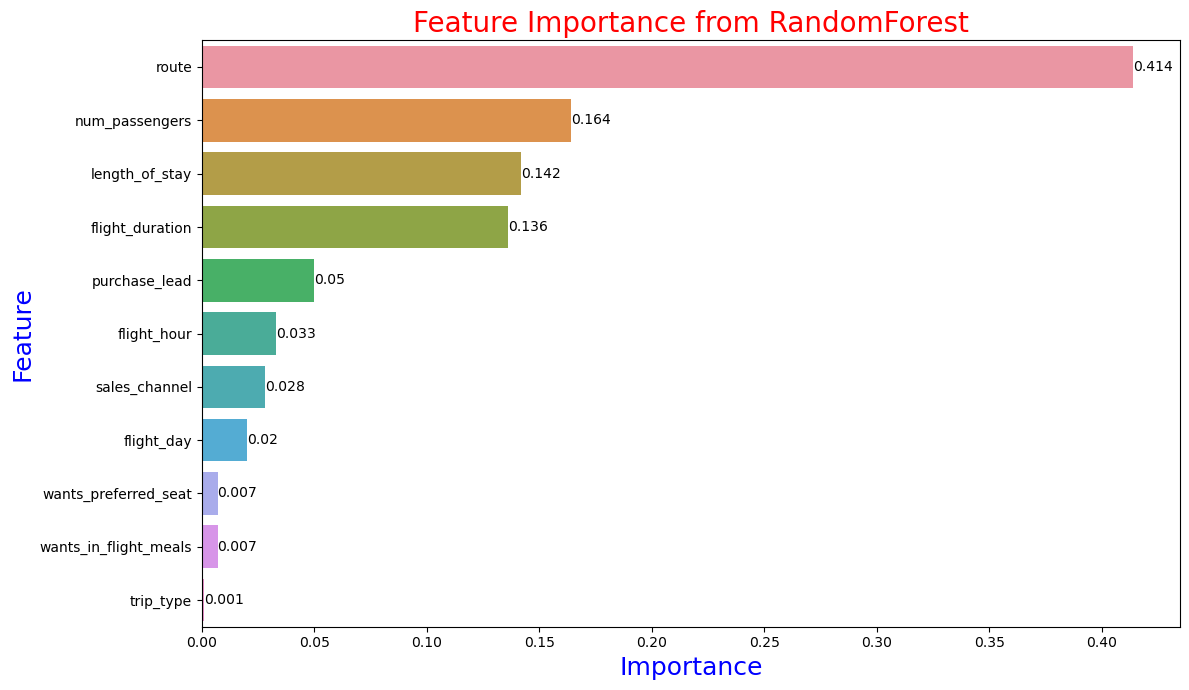

In [107]:
# Plot the feature importances
plt.figure(figsize=(12, 7))
ax=sns.barplot(x='Importances', y='Features', data=feature_importances_df.sort_values(by='Importances',ascending=False))
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Feature Importance from RandomForest', color='r', fontsize=20)
plt.xlabel('Importance', color='blue', fontsize=18)
plt.ylabel('Feature' , color='blue', fontsize=18)
plt.tight_layout()

### Summary of Feature Importance Findings:

The feature importance plot from the `RandomForestClassifier` highlights how different features contribute to the model's decision-making process. Here’s a summary of the findings:

### **Top Features:**

1. **`route` (Importance: 0.414)**
   - **Observation**: The `route` feature is by far the most important predictor, with an importance score of **0.414**. This indicates that the specific flight routes taken by customers have a strong influence on whether or not they complete a booking. Different routes may represent various demand levels, preferences, or availability that significantly affect the likelihood of completing a booking.

2. **`num_passengers` (Importance: 0.164)**
   - **Observation**: The number of passengers is also a critical feature, with an importance score of **0.164**. This suggests that bookings with a different number of passengers show varying likelihoods of being completed. For instance, solo travelers or couples may complete bookings more readily than larger groups.

3. **`length_of_stay` (Importance: 0.142)**
   - **Observation**: The number of days spent at the destination (`length_of_stay`) is another important feature, with a score of **0.142**. Customers booking shorter or longer stays may behave differently in terms of completing their bookings.

4. **`flight_duration` (Importance: 0.136)**
   - **Observation**: Flight duration also plays a notable role, with a score of **0.136**. Longer or shorter flights may impact booking behavior, with certain durations being more likely to result in completed bookings.

### **Mid-Tier Features:**

5. **`purchase_lead` (Importance: 0.05)**
   - **Observation**: The time between the booking date and the flight date (`purchase_lead`) shows a lower importance score of **0.05**. This suggests that how far in advance customers book their flights influences booking completion but to a lesser extent compared to top features like `route` and `num_passengers`.

6. **`flight_hour` (Importance: 0.033)**
   - **Observation**: The time of day at which the flight is scheduled (represented by `flight_hour`) shows a smaller importance score. While some customers may prefer certain flight times, this feature has a relatively minor impact on the model's predictions.

7. **`sales_channel` (Importance: 0.028)**
   - **Observation**: The platform or channel through which the booking is made (`sales_channel`) has an importance score of **0.028**. Though it contributes to the model, it’s not as influential as other factors like the route or the number of passengers.

### **Low-Importance Features:**

8. **`flight_day` (Importance: 0.02)**
   - **Observation**: The day of the week on which the flight occurs has a relatively low impact on whether bookings are completed, with an importance score of **0.02**. This indicates that the day of the flight doesn’t strongly influence customer booking behavior.

9. **`wants_preferred_seat`, `wants_in_flight_meals`, `trip_type` (Importance < 0.01)**
   - **Observation**: Preferences for in-flight services (e.g., preferred seats, meals) and the trip type (round-trip, one-way, etc.) have very low importance scores. These factors play a minimal role in determining whether a booking is completed. Customers may not be heavily influenced by these services when deciding to complete a booking.

---

### Key Insights:
- **Route Dominates**: The flight route is the most significant factor in predicting booking completion, which may indicate that certain routes are more popular, convenient, or in higher demand than others.
- **Passenger Count Matters**: The number of passengers is another critical factor, suggesting that solo travelers or small groups behave differently from larger groups when it comes to completing bookings.
- **Stay Duration and Flight Length**: These two factors also carry considerable weight, indicating that the length of the trip and the duration of the flight influence booking completion behavior.
- **In-Flight Services and Trip Type are Less Important**: Preferences for extra services such as in-flight meals and seating have little impact on booking completion, indicating that these are secondary factors for customers when finalizing a booking.

---

### Recommendations:
- **Focus on Key Routes**: Since `route` is the most important feature, optimizing services, promotions, and pricing around key routes could further improve booking completion rates.
- **Tailor Marketing for Solo and Group Travelers**: The importance of `num_passengers` suggests that different types of travelers (solo, couple, groups) may require targeted marketing or incentives to complete bookings.
- **Optimize for Popular Trip Durations**: The model highlights the significance of trip length and flight duration, suggesting that airlines could further enhance customer experience for trips of specific lengths or flight durations.
